In [3]:
import time
import pandas as pd
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
df= pd.read_csv('Stanford_only_comments_.csv', encoding ='utf-8')
df
df.columns = ['comments']
list11 = df['comments'].tolist()
list2 = [x.replace('\r', '').replace('\n', '').replace('\t', '') for x in list11]
list2

['exactly1',
 'yes',
 'exactly',
 'right',
 'true',
 '#stopthestigma',
 'true that! ⬆️✅',
 'Your now is not your forever, there are good times ahead :)',
 'A sweet reminder to all the workaholics :)',
 'yup',
 'A busy routine always helps, but yes relax time should be a part of the day.',
 'oh yes! ✅',
 'InshaAllahhh',
 'http://www.stresstherapist.net/real-life-difficulties/is-your-depression-your-fault',
 'This is so cute :(',
 'can you please also explain what really works?',
 'Advice like this is NOT COOL!',
 "These knowledge should b given to every one because we are not aware of these facts.. that is the cause root we as a parents don't know how to deal with children suffering from these situations..",
 'Most mental health issues are rooted in childhood traumas, lack of attention, parental fights, child abuse, excessive beating or strictness, lack of encouragement or excessive bullying. Parents and peers can either make or break children in their early formative years. Taking care

In [17]:
import re, string, unicodedata
import demoji
#removing URLs
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)
list3 = []
for k in list2:
    #print(k)
    list2 = remove_URL(k) #removing URL
    x = demoji.findall(list2) # finding the emojis
    emo = demoji.replace(list2) # removing emojis
    lower_case_sent = emo.lower()
    list3.append(lower_case_sent)

print(list3)


['exactly1', 'yes', 'exactly', 'right', 'true', '#stopthestigma', 'true that! ', 'your now is not your forever, there are good times ahead :)', 'a sweet reminder to all the workaholics :)', 'yup', 'a busy routine always helps, but yes relax time should be a part of the day.', 'oh yes! ', 'inshaallahhh', '', 'this is so cute :(', 'can you please also explain what really works?', 'advice like this is not cool!', "these knowledge should b given to every one because we are not aware of these facts.. that is the cause root we as a parents don't know how to deal with children suffering from these situations..", 'most mental health issues are rooted in childhood traumas, lack of attention, parental fights, child abuse, excessive beating or strictness, lack of encouragement or excessive bullying. parents and peers can either make or break children in their early formative years. taking care of our young ones is a collective responsibility we all have. learn about the right behaviors and ways t

In [18]:
#due to removal of emojis and urls there are some places that are now null so fixing those
list3 = ["nan" if x == '' else x for x in list3]
list3 = [y for y in list3 if str(y) != 'nan']
list3

['exactly1',
 'yes',
 'exactly',
 'right',
 'true',
 '#stopthestigma',
 'true that! ',
 'your now is not your forever, there are good times ahead :)',
 'a sweet reminder to all the workaholics :)',
 'yup',
 'a busy routine always helps, but yes relax time should be a part of the day.',
 'oh yes! ',
 'inshaallahhh',
 'this is so cute :(',
 'can you please also explain what really works?',
 'advice like this is not cool!',
 "these knowledge should b given to every one because we are not aware of these facts.. that is the cause root we as a parents don't know how to deal with children suffering from these situations..",
 'most mental health issues are rooted in childhood traumas, lack of attention, parental fights, child abuse, excessive beating or strictness, lack of encouragement or excessive bullying. parents and peers can either make or break children in their early formative years. taking care of our young ones is a collective responsibility we all have. learn about the right behavio

# VADER (Valence Aware Dictionary and sEntiment Reasoner)

## from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
## analyser = SentimentIntensityAnalyzer()

In [30]:
example = "Stanford teachers are awesome"
eg_score = analyser.polarity_scores(example)
eg_score

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [20]:
def sentiment_analyzer_scores1(text, engl=True):
    global trans,scoring
    translator = Translator()
    trans = translator.translate(text).text
#     print(trans)
    score = analyser.polarity_scores(trans)
    test = score
#     print(score)
    lb = score['compound']
    if lb >= 0.05:
        scoring = 1
    elif (lb > -0.05) and (lb < 0.05):
        scoring = 0
    else:
        scoring = -1
    return scoring

In [21]:
for comm in list3:
    sentiment_analyzer_scores1(comm)
    print(scoring)


0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
1
-1
-1
1
1
1
1
1
1
1
1
1
0
1
1
-1
-1
1
-1
-1
1
1
-1
0
1
1
1
1
1
1
-1
-1
1
0
-1
1
1
0
1
1
1
1
-1
-1
1
0


## Seaborn for Visualizing

In [22]:
def anl_tweets(lst, title='MentalHealthAwarenessPK', engl=True ):
    global sents,tw,st
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores1(tw, engl)
#             print(st)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='Comments_Count',
          title="Comments of "+title)
    return sents

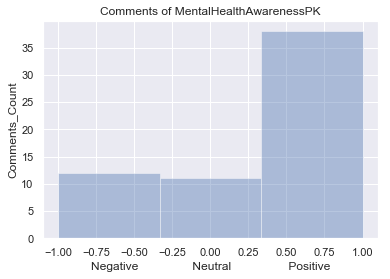

In [23]:
user_id = 'MentalHealthAwarenessPK'
fb_sent = anl_tweets(list3, user_id)


In [24]:
#creating a df with clean data
df_clean = pd.DataFrame(list3)
#giving name to colums
df_clean.columns = ['comments']
df_clean['sent_score'] = sents
df_clean.to_csv('Stanford_comments_scoring.csv')


## WORD CLOUDS

In [25]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

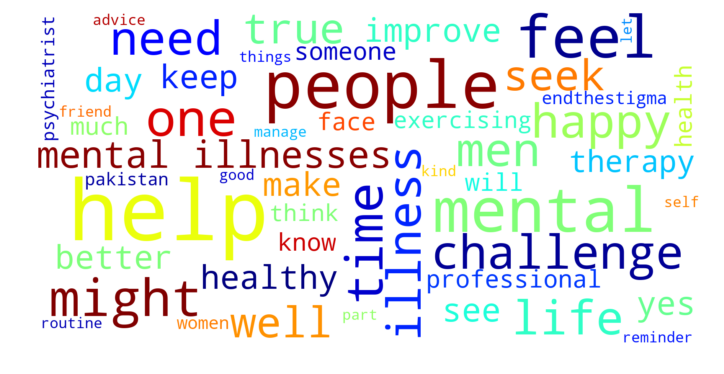

In [26]:
#Positive 
tw_pos = df_clean[df_clean['sent_score'] == 1]['comments']
word_cloud(tw_pos)

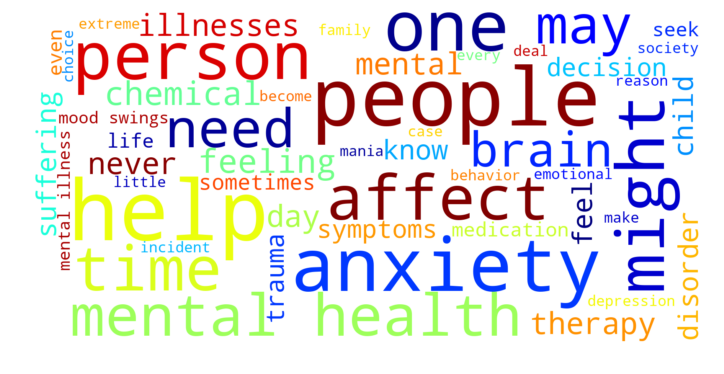

In [28]:
#Negative 
tw_neg = df_clean[df_clean['sent_score'] == -1]['comments']
word_cloud(tw_neg)

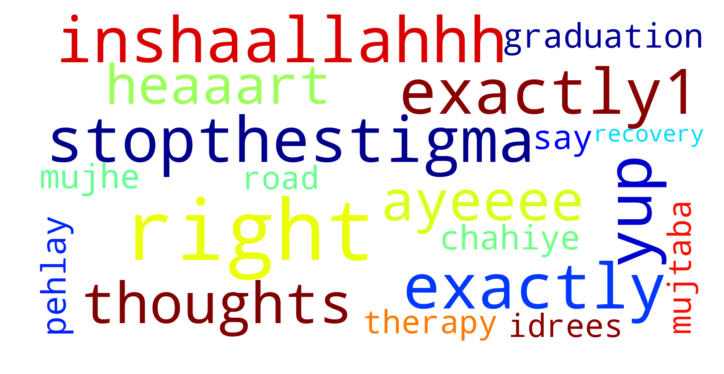

In [29]:
#Neutral
tw_neu = df_clean[df_clean['sent_score'] == 0]['comments']
word_cloud(tw_neu)